In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install plotly
import plotly.graph_objs as go
import seaborn as sns
from sklearn import datasets

  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11435 sha256=90afade39981add0f4fd6119c1ad76c1455667d3df173b96ca71dd5cb7d7f915
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying
  Using cached plotly-4.9.0-py2.py3-none-any.whl (12.9 MB)


In [5]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns =iris.feature_names)
iris_df.head() # See the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y_actual= iris.target
y_actual

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

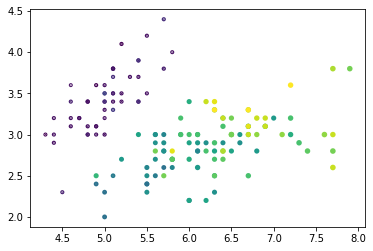

In [8]:
plt.scatter(iris_df['sepal length (cm)'],iris_df['sepal width (cm)'],iris_df['petal length (cm)'],iris_df['petal width (cm)'],linewidths=3 )

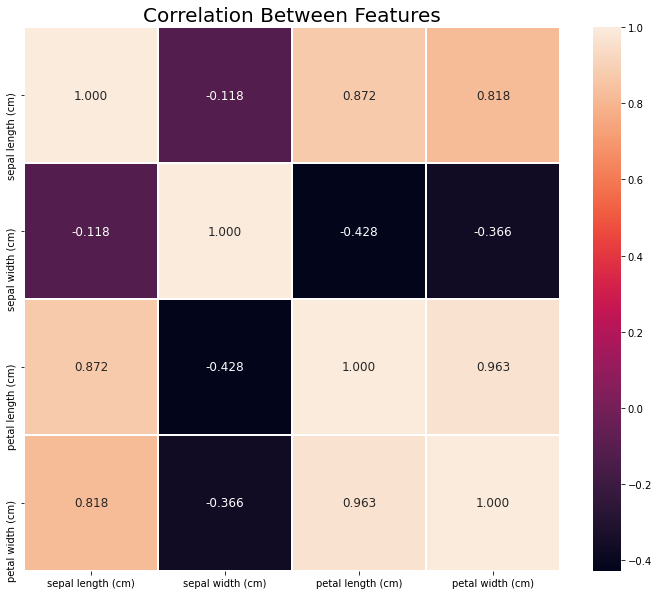

In [9]:

f,ax = plt.subplots(figsize=(12, 10))
sns.heatmap(iris_df.corr(), annot=True,annot_kws = {"size": 12}, linewidths=0.5, fmt = '.3f', ax=ax)
plt.title("Correlation Between Features", fontsize = 20)
plt.show()

In [10]:

# let we randomly assume k = 4 clusters...
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='k-means++')
km

KMeans(n_clusters=4)

In [11]:
km.fit(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

KMeans(n_clusters=4)

In [12]:
y_predicted=km.predict(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 3, 3, 3, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 3, 2, 2, 2, 2, 1, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3])

In [13]:
iris_df['clusters'] = y_predicted
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
iris_df.clusters.unique()

array([0, 3, 1, 2])

In [15]:
df1 = iris_df[iris_df.clusters==0]
df2 = iris_df[iris_df.clusters==1]
df3 = iris_df[iris_df.clusters==2]
df4 = iris_df[iris_df.clusters==3]

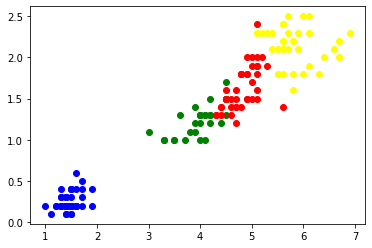

In [16]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='yellow')
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],color='red')

In [17]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

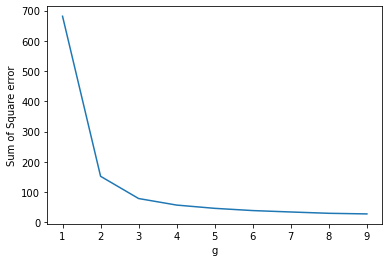

In [18]:
plt.xlabel('g')
plt.ylabel('Sum of Square error')
plt.plot(k_rng,sse)

In [19]:
# As we see above graph, let take clusters = 3
km3 = KMeans(n_clusters=3, init='k-means++')

In [20]:
km3.fit(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])

KMeans(n_clusters=3)

In [21]:
y_predicted3=km3.predict(iris_df[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']])
y_predicted3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [22]:

iris_df['clusters3'] = y_predicted3
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clusters,clusters3
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [23]:

iris_df.clusters3.unique()

array([1, 2, 0])

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
accuracy_score(y_actual, y_predicted3)

0.09333333333333334

In [26]:
pd.crosstab(y_actual, y_predicted3)

col_0,0,1,2
row_0,,,
0,0,50,0
1,2,0,48
2,36,0,14


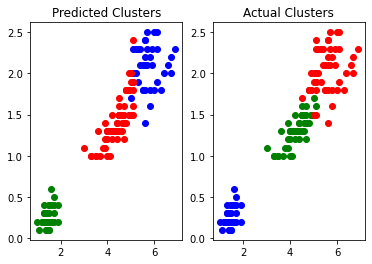

In [27]:

plt.figure()

plt.subplot(1,2,1)

df1 = iris_df[iris_df.clusters3==0]
df2 = iris_df[iris_df.clusters3==1]
df3 = iris_df[iris_df.clusters3==2]

plt.title("Predicted Clusters")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red')

plt.subplot(1,2,2)
df1 = iris_df[y_actual==0]
df2 = iris_df[y_actual==1]
df3 = iris_df[y_actual==2]

plt.title("Actual Clusters")
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='green')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],color='red')